<a href="https://colab.research.google.com/github/manish2393cool/ML-Python/blob/master/2_Forecasting_and_Predicting_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install Quandl

In [0]:
import pandas as pd
import quandl as q
import numpy as np

In [0]:
import math

In [0]:
q.ApiConfig.api_key = 'HyXNvMhpxYjiXjSuWZtu'
df = q.get('WIKI/GOOGL')

In [0]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] *100.0
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] *100.0

df = df[['Adj. Close', 'HL_PCT','PCT_Change', 'Adj. Volume']]

In [7]:
df.head(10)

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0
2004-08-26,54.122070,0.037068,2.820391,7094800.0
2004-08-27,53.239345,2.326896,-1.803885,6211700.0
2004-08-30,51.162935,3.411430,-3.106003,5196700.0
2004-08-31,51.343492,1.308977,0.048866,4917800.0


In [0]:
# can change depending on the forecast column you want
forecast_col = 'Adj. Close'
# adjust outlier
df.fillna(-99999, inplace = True)

In [0]:
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics.scorer import make_scorer
# train test split
from sklearn.model_selection import train_test_split

# cross_validation to handle bias and spread the data points
from sklearn.linear_model import LinearRegression

#now find x and y

Forecast for next 1%

In [10]:
# want to forecast 1% in future
forecast_out = int(math.ceil(0.1*len(df)))
# attributes which effect next days
df['label'] = df[forecast_col].shift(-forecast_out)
print("Days in advance: ", forecast_out)

Days in advance:  343


In [0]:
x = np.array(df.drop(['label'],1))
x = preprocessing.scale(x)
x_lately = x[-forecast_out:]
x = x[:-forecast_out]

df.dropna(inplace=True)

# scaling is together also scale new values but adds processing time
# can be skipped if high speed trading is going on
y = np.array(df['label'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [12]:
clf = LinearRegression()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)*100
print(accuracy)

88.46099948175066


In [13]:
# sincefor x_lately we have not predicted anything
forecast_set = clf.predict(x_lately)
print( forecast_set)
print("Accuracy:",accuracy)
print("for next how many days prediction is done: ",forecast_out)

[ 963.02917123  949.490177    977.79875373  974.54613555  985.23195311
  979.73077033  984.22777717  987.01566426  977.69705008  974.60787919
 1001.9059523   993.3150503   978.15091817  960.77087198  962.289722
  977.2200809   976.28779446  993.71240711  996.71625209 1014.89902289
 1012.41250758 1028.30509006 1027.65404465 1023.78045058 1013.93029282
 1018.92653653 1018.03198536 1013.51983091 1010.66342431 1010.62043058
 1017.91892523 1007.97681342 1004.34872385  994.01294217 1015.11433048
 1011.83310532 1017.0139469  1038.4778586  1034.57004935 1032.31978168
 1035.34641572 1034.58946852 1039.36100768 1031.96185529 1032.95881899
 1035.01693093 1031.87740354 1059.81715987 1061.28862527 1071.72616407
 1068.10464438 1068.73686416 1032.37761101 1024.71520728 1019.95206358
 1029.00649205 1026.88330456 1024.41416212 1038.01386918 1038.5225784
 1034.96289222 1043.4812867  1048.87557813 1048.41633354 1047.17680666
 1051.80189025 1057.56092331 1061.82647702 1065.14635521 1061.25667001
 1056.137

In [0]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

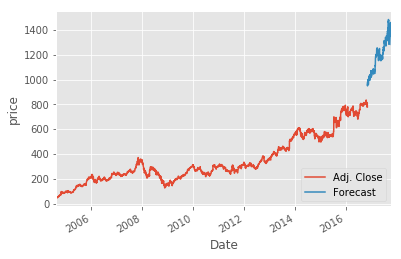

In [15]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

#now populate dataframe with the new dates and forecast values

for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]


# here date is taken as a index which can be checked using df.head()
# df.head()

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('price')
plt.show()

PLOTTING THE GRAPH

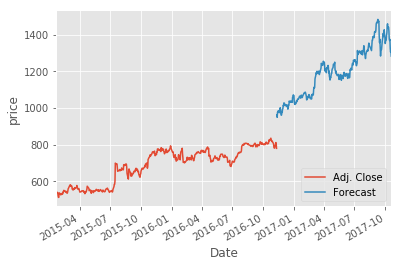

In [16]:
df['Adj. Close'].iloc[-800:df['Forecast'].shape[0]].plot()
df['Forecast'].iloc[-800:df['Forecast'].shape[0]].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('price')
plt.show()

As many jobs as you want

In [17]:
clf = LinearRegression(n_jobs=50)
clf.fit(x_train, y_train)
accuracy = round( clf.score(x_test, y_test)*100, 3 )
print(accuracy)

88.461
